# Data Transformation

## Feature Scaling (Normalization and Standarization)
Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features contribute equally to the model and to avoid the domination of features with larger values.

Feature scaling becomes necessary when dealing with datasets containing features that have different ranges, units of measurement, or orders of magnitude. In such cases, the variation in feature values can lead to biased model performance or difficulties during the learning process.

Feature Scaling involves modifying values by one of two primary methods: Normalization or Standardization. 

Normalization takes the input values and modifies them to lie between 0 and 1. 

Standardization methods modify the values so that they center at 0 and have a standard deviation of 1.

Tree-based algorithms are fairly insensitive to the scale of the features. A decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature.

## Techniques used in feature scaling

Two common techiques are: 

Min-max normalizaiton: This technique scales the values of a feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature from each value, and then dividing by the range of the feature.

z-score: This technique scales the values of a feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value, and then dividing by the standard deviation.

## Normalization VS Standardization 
|Normalization |Standardization|
|:-------------|:----------------|
|Rescales values to a range between 0 and 1|Centers data around the mean and scales to a standard deviation of 1|
|Useful when the distribution of the data is unknown or not Gaussian|Useful when the distribution of the data is Gaussian or unknown|
|Sensitive to outliers|Less sensitive to outliers|
|Retains the shape of the original distribution	|Changes the shape of the original distribution|
|May not preserve the relationships between the data points|Preserves the relationships between the data points|


In [1]:
import pandas as pd
weather=pd.read_csv("LAX.csv",index_col="DATE")
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "temp_max", "temp_min"]
core_weather.apply(pd.isnull).sum()
LA_Weather = core_weather.dropna()
LA_Weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

array([[<AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'temp_min'}>, <AxesSubplot:>]],
      dtype=object)

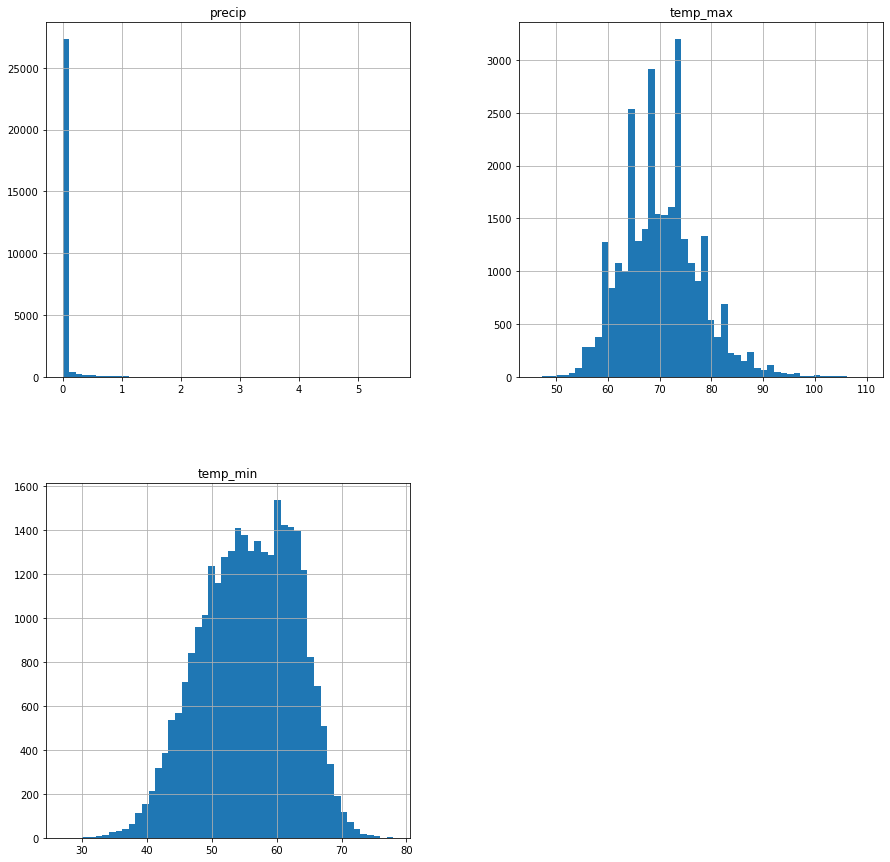

In [2]:
LA_Weather.hist(bins=50,figsize=(15,15))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

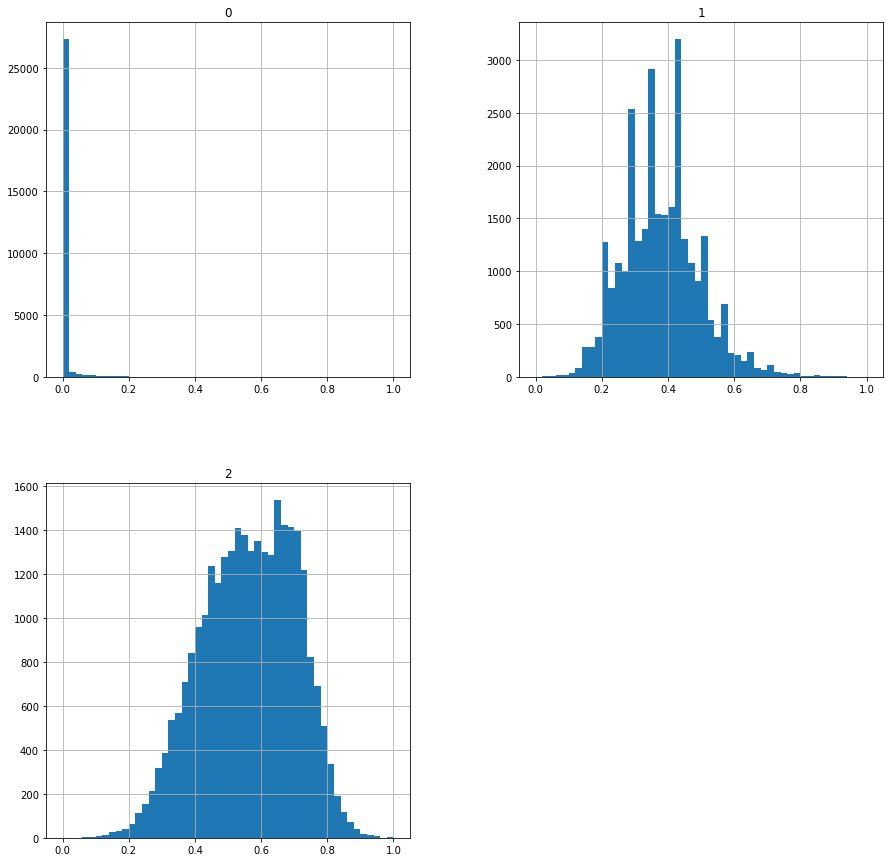

In [3]:
# Normalization
from sklearn import preprocessing

x = LA_Weather.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df2= pd.DataFrame(x_scaled)
normalized_df2.hist(bins=50,figsize=(15,15))

array([[<AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'temp_min'}>, <AxesSubplot:>]],
      dtype=object)

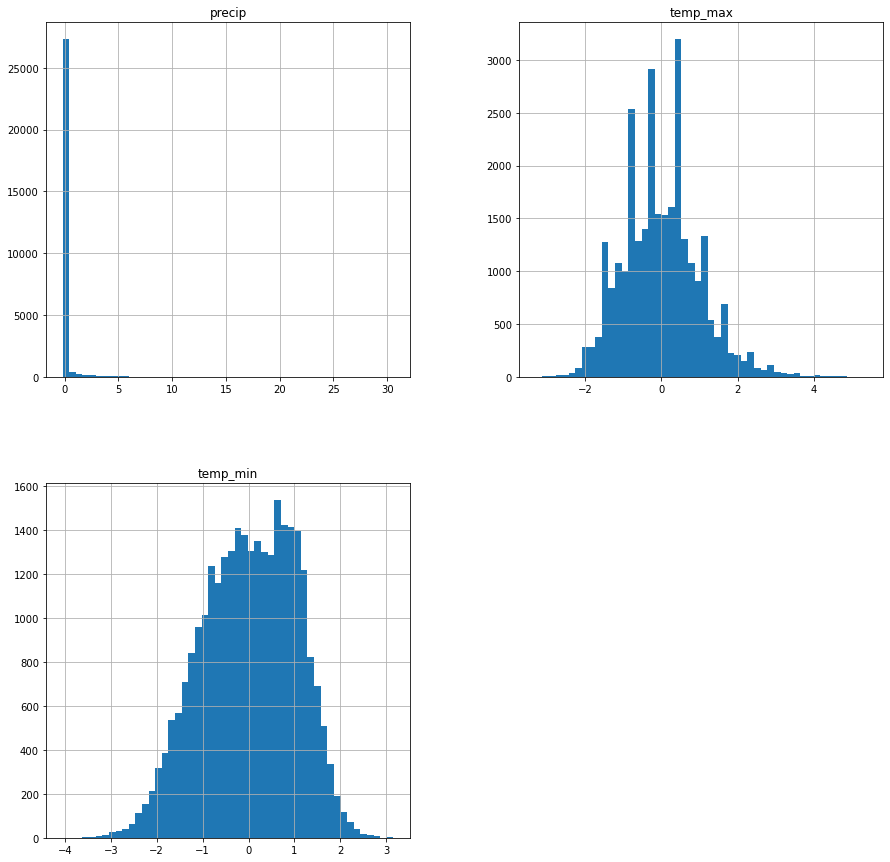

In [4]:
# Standardization
from scipy.stats import zscore
sandardized_weather=LA_Weather.apply(zscore)
sandardized_weather.hist(bins=50,figsize=(15,15))

# Data Recovery

## Types of Missing Data
|Type |Definition|
|:-----|:----------|
|Missing completely at random (MCAR)|Missing data are randomly distributed across the variable and unrelated to other variables.|
|Missing at random (MAR)|Missing data are not randomly distributed but they are accounted for by other observed variables.|
|Missing not at random (MNAR)| Missing data systematically differ from the observed values.|

## Techniques to Manage Missing Data

### Deleting Rows with missing values:
Generally, this approach is not recommended. It is one of the quick and dirty techniques one can use to deal with missing values. If the missing value is of the type Missing Not At Random (MNAR), then it should not be deleted.

### Impute missing values for continuous variable:
Replacing with an arbitrary value, mean, mode, median, forward fill, back fill, interpolation, or modeling.

### Impute missing values for categorical variable:
Replace with the Most Frequent Value or the Value “Missing". 

In [12]:
import pandas as pd
weather=pd.read_csv("LAX.csv",index_col="DATE")
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "temp_max", "temp_min"]
core_weather.apply(pd.isnull).sum()

precip      214
temp_max    243
temp_min    220
dtype: int64

In [13]:
Test1=core_weather.fillna(core_weather.median())
Test1.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [14]:
Test2=core_weather.fillna(core_weather.mode())
Test2.apply(pd.isnull).sum()

precip      214
temp_max    243
temp_min    220
dtype: int64

In [15]:
Test3=core_weather.fillna(core_weather.mean())
Test3.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [16]:
Test4=core_weather.fillna(method ='bfill')
Test4.apply(pd.isnull).sum()

precip      1
temp_max    1
temp_min    1
dtype: int64